## Support Vector Machines
<br>

Support Vector Machines are __supervised learning__ models for classification and regression problems. . SVM is commonly used in classfication of text documents or image identification , in general has a good accuracy in predicting __High dimensional features.__

### Use Case: Predict Rating of Side Effects of a Drug basis online comments

### Load Libraries

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
# Iteratively read files
import glob
import os

# For displaying images in ipython
from IPython.display import HTML, display
# Plotting libraries
from IPython.display import SVG
#from graphviz import Source
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

### Load data files
Drug Rating data: https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Druglib.com%29

citation: Felix Gräßer, Surya Kallumadi, Hagen Malberg, and Sebastian Zaunseder. 2018. Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning. In Proceedings of the 2018 International Conference on Digital Health (DH '18). ACM, New York, NY, USA, 121-125. DOI

In [2]:
df = pd.read_csv("drugLib_raw/drugLibTrain_raw.tsv",sep= "\t")

In [3]:
print("Size of training data set: {}".format(df.shape))
print("................................................\n")
df.head()

Size of training data set: (3107, 9)
................................................



,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [4]:
df = df.dropna() # drop any na / null rows from data

In [5]:
# Load test data separately
test = pd.read_csv("drugLib_raw/drugLibTest_raw.tsv",sep= "\t")
print("Size of training data set: {}".format(test.shape))
print("................................................\n")
test.head()

Size of training data set: (1036, 9)
................................................



,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


In [6]:
ratings = df['sideEffects'].value_counts()
ratings

Mild Side Effects                1017
No Side Effects                   925
Moderate Side Effects             612
Severe Side Effects               367
Extremely Severe Side Effects     175
Name: sideEffects, dtype: int64

### Split Data ---> Train(80%) Test (20%)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df["sideEffectsReview"], df["sideEffects"],random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((2476,), (620,), (2476,))

### Build Preprocessing ---> Model Training Pipeline

- Using Naive Bayes Classfier

In [8]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [9]:
model = clf.fit(X_train,y_train)

In [10]:
print("Accuracy of Naive Bayes Classifier is {}".format(model.score(X_test,y_test)))

Accuracy of Naive Bayes Classifier is 0.4596774193548387


### Build Preprocessing ---> Model Training Pipeline

### Using Support Vector Machine

### Introduciton: 
Rather than modeling each class, we simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other.

<img src="images/svm.jpeg" alt="svm" style="width:30%">

### Goal:
To maximize the margin between the points on either side of the so called decision line. The benefit of this process is, that after the separation, the model can easily guess the target classes (labels) for new cases.

#### Linear & Non Linear Data
- Linear data or two variables are called linear if there relationship can be expressed as Y = (a0 + aiX) which is equation of line. The same data can also be divided into two regions using a line.
<br>

<img src="images/linear_nonlinear.png" alt="lin" style="width:50%">
- Non Linear data - has complex relationship among variables (features) and cannot be easily separated by a line as show by above figure on the right.

### Kernel Trick for Non Linear data
It is a set of mathematical transformation of exisiting features into higher dimentional feature space. This allows to define separable boundary to classify data between multiple categories.

<img src="images/kernel.png" alt="kernel" style="width:50%">

In [33]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', svm.SVC(kernel = "linear")),
    ])

In [34]:
model = clf.fit(X_train,y_train)

In [35]:
print("Accuracy of Support Vector Machine Classifier is {}".format(model.score(X_test,y_test)))

Accuracy of Support Vector Machine Classifier is 0.5258064516129032


### Construct Confusion Matrix

In [15]:
# Predict on Test data
y_predicted = model.predict(X_test)
y_predicted[0:10]

array(['No Side Effects', 'No Side Effects', 'No Side Effects',
       'Moderate Side Effects', 'No Side Effects',
       'Moderate Side Effects', 'No Side Effects', 'No Side Effects',
       'No Side Effects', 'Mild Side Effects'], dtype=object)

In [16]:
#Confusion Matrix
#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[  1,   3,  10,   4,  18],
       [  0, 123,  24,  54,   7],
       [  3,  63,  41,  16,   5],
       [  1,  34,   4, 142,   1],
       [  3,  19,  18,   7,  19]])

In [17]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[  1   3  10   4  18]
 [  0 123  24  54   7]
 [  3  63  41  16   5]
 [  1  34   4 142   1]
 [  3  19  18   7  19]]
Normalized confusion matrix
[[0.03 0.08 0.28 0.11 0.5 ]
 [0.   0.59 0.12 0.26 0.03]
 [0.02 0.49 0.32 0.12 0.04]
 [0.01 0.19 0.02 0.78 0.01]
 [0.05 0.29 0.27 0.11 0.29]]


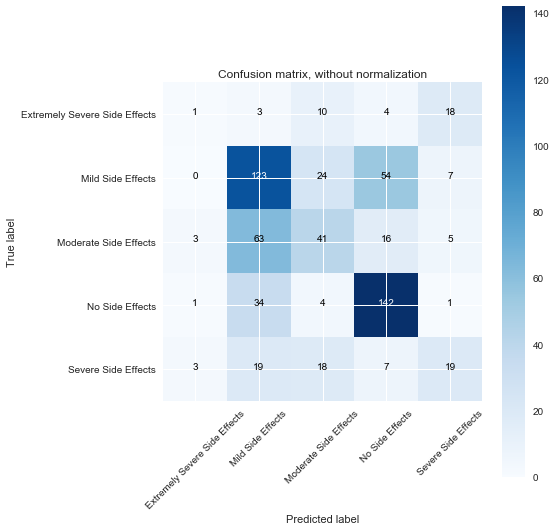

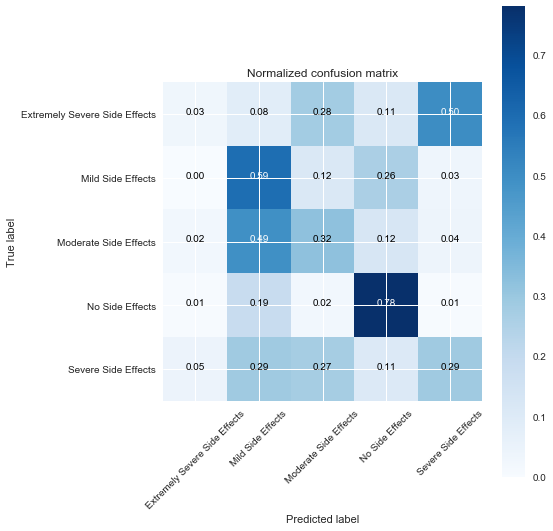

In [18]:
#With Normalization
plt.figure(figsize= (8,8))
plot_confusion_matrix(cnf_matrix, classes= np.sort(df["sideEffects"].unique()),
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure(figsize= (8,8))
plot_confusion_matrix(cnf_matrix, classes= np.sort(df["sideEffects"].unique())
                      , normalize=True,title='Normalized confusion matrix')

plt.show()

### Build Model on Entire Data and predict Test data

In [19]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', svm.SVC(kernel = "linear")),
    ])

In [20]:
model = clf.fit(df["sideEffectsReview"],df["sideEffects"])

In [21]:
print("Accuracy of Naive Bayes Classifier is {}".
      format(model.score(test["sideEffectsReview"],test["sideEffects"])))

Accuracy of Naive Bayes Classifier is 0.5337837837837838


### Construct Confusion Matrix

In [ ]:
y_pred = model.predict(test["sideEffectsReview"])
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(test["sideEffects"], y_pred)
np.set_printoptions(precision=2)
cnf_matrix

In [ ]:
#With Normalization
plt.figure(figsize= (8,8))
plot_confusion_matrix(cnf_matrix, classes= np.sort(df["sideEffects"].unique()),
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure(figsize= (8,8))
plot_confusion_matrix(cnf_matrix, classes= np.sort(df["sideEffects"].unique())
                      , normalize=True,title='Normalized confusion matrix')

plt.show()

### Pros & Cons of SVM

Below excertp from sklearn documentation on svm.

__The advantages of support vector machines are:__

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
<br>

__The disadvantages of support vector machines include:__

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross validation (see Scores and probabilities, below).

### Further Reading / Exploration

Analytics Vidya: https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

kdnuggets: https://www.kdnuggets.com/2017/08/support-vector-machines-learning-svms-examples.html